In [2]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [3]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [4]:
#pip install konlpy

In [5]:
#pip install beautifulsoup4

## 주가 읽기

In [16]:
import pandas as pd
stock = pd.read_csv("F:/news/newss/sk하이닉스.csv")
stock
#type(stock)

,date,start,open,max,min,count,per,거래량
0,2021-04-30,"128,000","130,000","130,500","126,500",3940000.0,-0.0154,3.94M
1,2021-04-29,"130,000","131,500","132,500","129,000",940.0,0.0000,0.94K
2,2021-04-28,"130,000","135,000","135,000","130,000",7130.0,-0.0370,7.13K
3,2021-04-27,"135,000","133,500","136,000","133,000",13610.0,0.0266,13.61K
4,2021-04-26,"131,500","132,000","132,500","130,500",730.0,-0.0075,0.73K
...,...,...,...,...,...,...,...,...
69,2021-02-05,"127,500","126,500","128,000","124,500",3490000.0,0.0200,3.49M
70,2021-02-04,"125,000","127,500","128,500","124,000",1030.0,-0.0385,1.03K
71,2021-02-03,"130,000","131,000","131,500","128,500",3630.0,0.0000,3.63K
72,2021-02-02,"130,000","128,000","132,500","127,000",100.0,0.0400,0.10K


# 토큰화

### bs4를 버리든 수정하든 고려해야 함

In [6]:
import requests
import urllib.request
import urllib.parse
from urllib.request import urlopen
from bs4 import BeautifulSoup
webpage = requests.get("https://find.mk.co.kr/new/search.php?pageNum=1&cat=&cat1=&media_eco=&pageSize=20&sub=news&dispFlag=OFF&page=news&s_kwd=sk%C7%CF%C0%CC%B4%D0%BD%BA&s_page=news&go_page=&ord=1&ord1=1&ord2=0&s_keyword=sk%C7%CF%C0%CC%B4%D0%BD%BA&period=p_month&s_i_keyword=sk%C7%CF%C0%CC%B4%D0%BD%BA&s_author=&y1=2021&m1=03&d1=01&y2=2021&m2=04&d2=01&ord=1&area=ttbd")
soup = BeautifulSoup(webpage.content, "html.parser")
soup = soup.find_all('span',{'class':'art_tit'})
#soup = soup.find_all('a')
#print(soup)

#print(soup['href'])
#href = soup.attrs['href']

#for a_tag in soup :
#       print(a_tag.a['href'])

# print(a_tag["href"]) # 찾은 a태그의 href 값 크롤링

In [7]:
webpage = requests.get("https://www.mk.co.kr/news/home/view/2021/04/313852/")
soup = BeautifulSoup(webpage.content, "html.parser")
soup = soup.find_all('div',{'id':'article_body'})
print(soup)

[<div id="article_body" itemprop="articleBody">
<div class="art_txt">
<div class="img_center" originh="438" originw="700" style="width: 700px;">
<img alt="애플 협력업체에서 청정에너지를 생성하고 있는 모습. 협력업체들은 전세계 지역사회에 8기가와트 규모 청정에너지를 제공하고 있다. [사진제공=애플]" border="0" hspace="0" src="https://file.mk.co.kr/meet/neds/2021/04/image_readtop_2021_313852_16172707244595691.jpg" vspace="0" width="700"/><br/>
<figure><figcaption><img alt="사진설명" src="//img.mk.co.kr/main/2015/mk_new/ic_arrow_top.gif"/>애플 협력업체에서 청정에너지를 생성하고 있는 모습. 협력업체들은 전세계 지역사회에 8기가와트 규모 청정에너지를 제공하고 있다. [사진제공=애플]</figcaption></figure>
<br/><br/>[이승윤 기자 / 우수민 기자]<br/>[ⓒ 매일경제 &amp; mk.co.kr, 무단전재 및 재배포 금지]
        
					<!--이미지 키우는 스크립트-->
<script>window.jQuery || document.write("<script src='//common.mk.co.kr/common/include/mklib/jquery.js'>")</script>
<script src="//www.mk.co.kr/news/js/zoom.js" type="text/javascript"></script>
</div>
</div>]


In [8]:
newsa = "SK하이닉스가 올해 회사채 발행을 위한 수요예측에서 최대 흥행을 이끌어냈다. 2조원 이상의 자금이 몰리면서 시장에서 흔들림없는 입지를 확인했다. 나이스신용평가로부터 등급 전망을 '부정적'으로 평가받아 등급 조정에 대한 불안감도 있었지만 투심은 견조했다.잠정 연간 실적이 크게 반등하면서 투자자들의 관심은 반도체 업황 개선에 몰렸다. 작년 대비 올해에는 10년물 뿐만 아니라 7년물에도 수요가 고르게 분포했다.◇2조700억 수요 모집, 5년물 아쉬운 금리5일 투자은행(IB)업계에 따르면 SK하이닉스는 공모채 6000억원 모집을 위해진행한 수요예측에서 2조700억원 규모의 기관 지금을 모았다. 모집액의 3배를 웃도는 수요가 채워지면서 빅이슈어로서 위상이 부각됐다.발행일은 13일이다. SK증권, NH투자증권, 미래에셋증권이 대표주관을 맡아 공모채 조달 파트너로서 톡톡한 역할을 했다. SK증권과 NH투자증권은 지난해 발행에 이어 올해에도 대표 주관사에 이름을 올렸다.SK하이닉스는 매해 1조원 가량의 대규모 자금을 시장에서 조달한 이슈어인만큼 올해도 기관의 관심은 최고조였다. 트렌치별로 3년물 2000억원, 5년물 2000억원, 7년물 800억원, 10년물 1200억원 모집에 나서서 각각 3년물 7800억원, 5년물 6700억원, 7년물 2900억원, 10년물 3300억원의 주문 물량을 채웠다.지난해에는 7년물에 수요가 상대적으로 덜 물리면서 7년물만 민평 대비 5bp높은 금리에 발행이 이뤄졌다. 3·5년물은 민평금리와 동일한 수준, 10년물은 민평금리보다 10bp 낮게 금리가 형성됐다. 3·5·7·10년물 총 5000억원 모집에 나서서 1조600억원으로 증액을 확정하며 금리를 3년물 1.614%, 5년물 1.717%, 7년물 1.929%, 10년물 2.213%에 확정했다.2019년에도 3·5·7·10년물 5000억원을 모집액으로 제시해 9800억원으로 증액 발행한 바 있다. 3년물에서만 민평금리보다 5bp 높은 수준에서 금리가 책정됐고, 5년물은 민평 대비 -1bp, 7년물은 -3bp, 10년물은 -11bp 낮춰 금리가 정해졌다.올해에는 수요가 고르게 분포된 편이었지만 5년물에서 금리가 민평 금리보다 높게 모집이 되며 다소 아쉬운 결과가 나왔다. 개별 민평금리 대비 -20bp~+20bp 수준에서 희망 금리밴드를 책정한 가운데 3년물과 7년물은 모집액 기준 민평금리와 동일한 수준에 책정됐다. 5년물만 민평 대비 7bp 높은 수준에서 금리가 마감됐다. 10년물은 민평 대비 금리를 15bp나 낮췄다.SK하이닉스는 수요예측이 흥행하면서 최대 1조2000억원으로 증액할 가능성이 높다. 증액이 성사될 경우 단일회차 기준 공동 최대어가 된다. 지금까지 최대어는 올 2월 LG화학이 발행한 1조2000억원 규모의 공모채다. LG화학도 6000억원 모집에 나서서 수요예측 흥행으로 1조2000억원으로 증액을 결정한 바 있다.◇실적 반등·슈퍼사이클 기대감…크레딧 불안감 눌렀다지난해 2월 발행에서는 급감한 실적 발표에 우려가 높았지만 2조원 이상의 주문을 받아내면서 탄탄한 입지를 구축했다. 당시 줄어든 실적에도 순이익 2조원을 달성하면서 신뢰를 쌓았다. 1~2년 안에 반도체 업황의 수퍼사이클이 다시 돌아올 거라는 투자자들의 기대감도 한몫 했다.올해는 실제 글로벌 반도체 품귀현상으로 펀더멘털이 견고해지고 있다. 코로나19로 인한 비대면 문화확산으로 PC와 서버용 반도체 수요가 증가한 덕분이다. 올 들어 완성차 업체가 공장가동을 중단할 정도로 자동차 반도체도 품귀 현상을 보이고 있다.2020년 연간 잠정실적에서도 연결기준 매출액 31조9004억원, 영업이익 5조126억원, 순이익 4조7589억원을 달성했다. 전년 대비 매출액이 18.2% 성장하는 동안 영업이익과 순이익은 각각 84.3%, 136.9% 늘어났다.다만 실적 상승과 긍정적 업황 전망에도 불구하고 인텔 인수 대금 지급 부담이 커진 탓에 크레딧 조정에 대한 불안감은 큰 편이다. SK하이닉스는 경쟁력 강화를 위해 지난해 10월 미국 인텔의 NSG(Non-volatile Memory Solutions Group)의 옵테인 사업부문을 제외한 낸드플래시 사업 전체를 인수하기로 했다.지난해 11월 국내 신용평가사 중 나신평이 유일하게 SK하이닉스의 신용등급 전망을 '안정적'에서 '부정적'으로 조정했다. 나신평은 '해외법인 투자로 인해 차입부담이 증가했다'며 '글로벌 변동성이 확대되면서 이익창출력의 불확실성이 높아졌고 대규모의 투자자금소요로 중단기적으로 재무안정성의 개선이 지연될 것으로 전망된다'고 평가했다.한기평도 '에스케이하이닉스의 인텔 낸드사업 인수로 재무부담 확대가 예상된다'며 구체적인 자금조달 계획발표 시점에 신용등급을 재검토하겠다는 입장을 밝혔다. 신용등급 강등 가능성은 높아지고 있는 분위기다.계약 규모는 10조3104억원으로 계약 당시 SK하이닉스의 현금성 자산 약 4조8000억원을 웃도는 규모다. 올해 말까지 70억 달러(약 7조8000억원), 2025년 3월까지 20억 달러(약 2조2000억원)를 지급할 예정이다.나신평이 SK하이닉스의 신용등급 하향 트리거로 '순차입금의존도 5% 상회 지속'을 제시한 가운데, 2018년까지 마이너스(-)에서 관리되던 지표는 지난해 12%를 돌파하며 기준을 충족한 상태다."

In [9]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
n=kkma.nouns(newsa)
pprint(n)

['하이닉스',
 '올해',
 '회사채',
 '발행',
 '수요',
 '수요예측',
 '예측',
 '최대',
 '흥행',
 '2',
 '2조원',
 '조',
 '원',
 '이상',
 '자금',
 '시장',
 '흔들림',
 '입지',
 '확인',
 '나이스',
 '나이스신용평가',
 '신용',
 '평가',
 '등급',
 '전망',
 '부정적',
 '조정',
 '불안감',
 '투심',
 '견',
 '견조',
 '조',
 '잠정',
 '연간',
 '실적',
 '반등',
 '투자자',
 '관심',
 '반도체',
 '업',
 '업황',
 '황',
 '개선',
 '작년',
 '대비',
 '10',
 '10년',
 '년',
 '뿐',
 '7',
 '7년물',
 '물',
 '분포',
 '2조700억',
 '700',
 '억',
 '모집',
 '5',
 '5년물',
 '금리',
 '금리5일',
 '일',
 '투자',
 '투자은행',
 '은행',
 '업계',
 '공모채',
 '6000',
 '6000억원',
 '진행',
 '규모',
 '기관',
 '지금',
 '모집액',
 '액',
 '3',
 '3배',
 '배',
 '빅',
 '빅이슈어로',
 '이슈',
 '어로',
 '위상',
 '부각',
 '발행일',
 '13',
 '13일',
 '증권',
 '투자증권',
 '미래',
 '셋',
 '셋증권',
 '대표',
 '대표주관',
 '주관',
 '조달',
 '파트너',
 '역할',
 '지난해',
 '주관사',
 '사',
 '이름',
 '1',
 '1조원',
 '가량',
 '대규모',
 '만큼',
 '최고',
 '트렌치',
 '3년물',
 '2000',
 '2000억원',
 '800',
 '800억원',
 '10년물',
 '1200',
 '1200억원',
 '7800',
 '7800억원',
 '6700',
 '6700억원',
 '2900',
 '2900억원',
 '3300',
 '3300억원',
 '주문',
 '물량',
 '상대적',
 '평',
 '년',
 '평금리',
 '동일',
 

In [28]:
import pandas as pd
kunfile = pd.read_csv("D:\R_project\KnuSentiLex-master/SentiWord_Dict.txt", delimiter = '\t')
print(kunfile)

         (-;    1
0      (;_;) -1.0
1       (^^)  1.0
2      (^-^)  1.0
3       (^^*  1.0
4      (^_^)  1.0
...      ...  ...
14849  갈등 -1  NaN
14850     의혹 -1.0
14851  내팽개치다 -2.0
14852     횡령 -2.0
14853    불안증 -2.0

[14854 rows x 2 columns]


In [39]:
#tokens = [t for d in n for t in d[0]]
print(len(n))

359


In [42]:
import nltk
text = nltk.Text(n, name='NMSC')
print(text)

<Text: NMSC>


In [43]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

359
356
[('조', 2),
 ('년', 2),
 ('평', 2),
 ('하이닉스', 1),
 ('올해', 1),
 ('회사채', 1),
 ('발행', 1),
 ('수요', 1),
 ('수요예측', 1),
 ('예측', 1)]


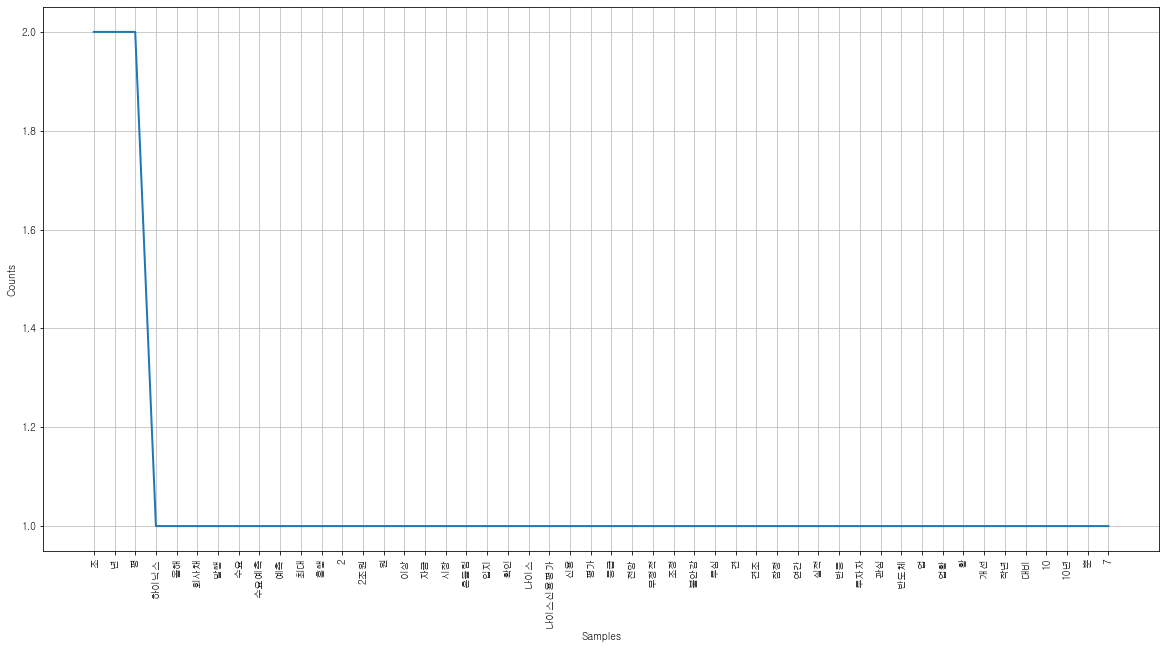

In [45]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [ ]:
pip install wheel
cd \
pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl